# 环境准备

In [8]:
import pandas as pd
import numpy as np
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['font.size'] = 10     # 用来显示字体大小
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# 创建3D柱状图

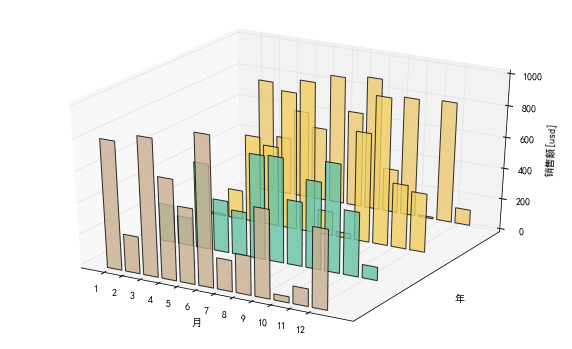

In [9]:
import random
import matplotlib.dates as mdates
fig = plt.figure(figsize=(10,6))  # 设置图表大小
ax = fig.add_subplot(111, projection='3d')   # 添加3d坐标轴
for z in [2011, 2012, 2013, 2014]:
    xs = xrange(1, 13)
    ys = 1000 * np.random.rand(12)
    color = plt.cm.Set2(random.choice(xrange(plt.cm.Set2.N))) # 从颜色映射集合在随机选择一种颜色
    ax.bar(xs, ys, zs=z, zdir='y', color=color, alpha=0.8)
ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(xs))  # 设置坐标刻度
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(ys))
ax.set_xlabel('月')
ax.set_ylabel('年')
ax.set_zlabel('销售额[usd]')
plt.show()

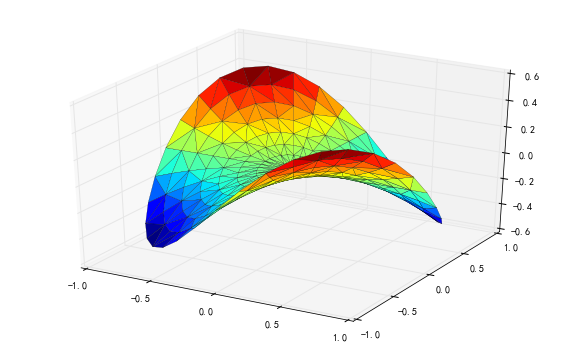

In [10]:
n_angles = 36
n_radii = 8
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
x = np.append(0, (radii * np.cos(angles)).flatten())
y = np.append(0, (radii * np.sin(angles)).flatten())
z = np.sin(-x * y)
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)
plt.show()

# 创建3D直方图

直方图表示的是一些值在特定列（bin）中的发生率。

三维直方图表示的是在一个网格中的发生率。网格是矩形的，表示的是在两列中关于两个变量的发生率。

3D直方图可以很容易地识别3个独立变量之间的相关性。可以用它们来从图形中提取信息，其中第三个维度可以是所分析的图像的（x,y）空间通道的强度。

虽然3D会显示更多的信息，但很多情况下比2D更让人感到迷惑，所以选择3D之前应慎重考虑。

1、使用Numpy，因为其拥有计算两个变量的直方图的函数。
2、用正态分布函数生成x和y，但是给它们提供不同的参数，以便能区分结果直方图的相互关系。
3、用相同的数据集合绘制散点图，展示散点图和3D直方图显示上的差异。

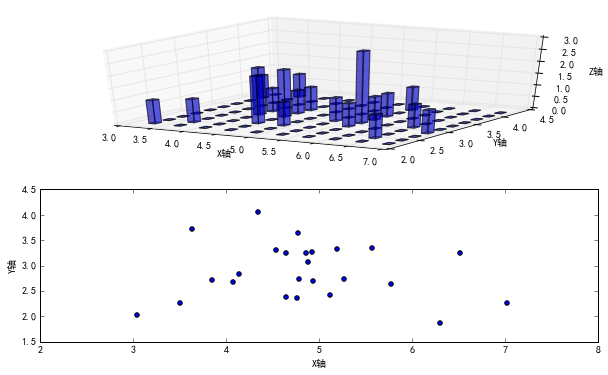

In [11]:
samples = 25
x = np.random.normal(5, 1, samples)
y = np.random.normal(3, .5, samples)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(211, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=10)    # 生成直方图，返回直方图，x bin边界和y bin边界
elements = (len(xedges) - 1) * (len(yedges) - 1)
xpos, ypos = np.meshgrid(xedges[:-1]+.25, yedges[:-1]+.25)  # 把x和y位置的向量合并到2D空间网格中（矩阵）
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(elements)
dx = .1 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()
#  dx和dy表示每一个矩形条底部的宽度
#  dz为z轴上的值，表示在一个特定的bin中一般的x和y样本的个数
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', alpha=0.4)  # 
ax.set_xlabel('X轴')
ax.set_ylabel('Y轴')
ax.set_zlabel('Z轴')
ax2 = fig.add_subplot(212)
ax2.scatter(x, y)
ax2.set_xlabel('X轴')
ax2.set_ylabel('Y轴')
plt.show()

# 在matplotlib中创建动画

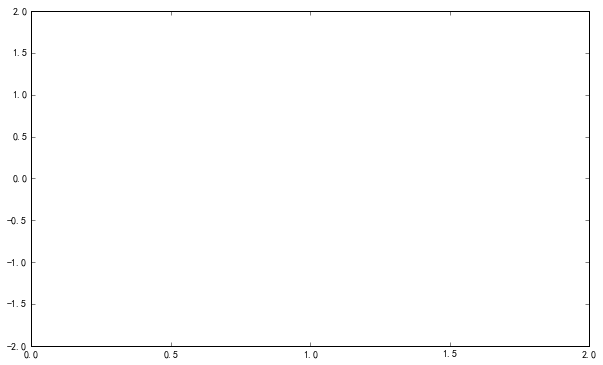

In [13]:
from matplotlib import animation
fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, =ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 *i)) * np.cos(22 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,
animator = animation.FuncAnimation(fig, animate, init_func=init, frames = 200 , interval=20, blit=True)
# animator.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'], writer='ffmpeg_file')
plt.show()

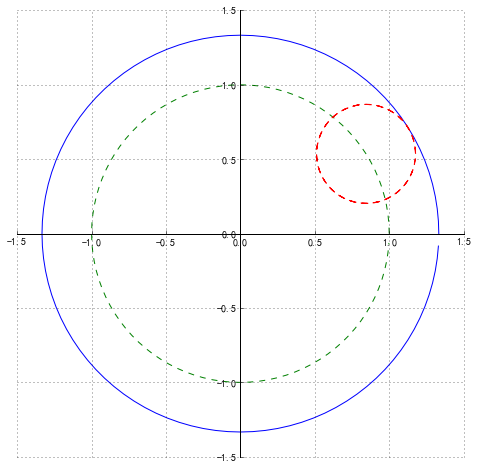

In [23]:
fig = plt.figure(figsize=(8, 8))
plt.ylim([-1.5, 1.5])
plt.xlim([-1.5, 1.5])
plt.grid(True)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
n = 3.0
theta = np.arange(0, 2*np.pi, np.pi/50)
x0 = (n+1)/n * np.cos(theta)
y0 = (n+1)/n * np.sin(theta)
plt.plot(x0, y0)
x1 = np.cos(theta)
y1 = np.sin(theta)
plt.plot(x1,y1,'--')
x2 = x1[9] + 1/n * np.cos(theta * n)
y2 = y1[9] + 1/n * np.sin(theta * n)
plt.plot(x2,y2,'--')
def update_position(num, data, plts):
    x1, y1, n = data
    theta = np.arange(2* num * np.pi, 2 * (num+1) * n * np.pi, np.pi /50)
    x2 = x1[num] +1.0 /n * np.cos(theta * n)
    y2 = y1[num] +1.0 /n * np.sin(theta * n)
    circular, scatter = plts
    circular.set_data(x2, y2)
    x3, y3 = scatter.get_data()
    x3, y3 = np.asarray(x3), np.asarray(y3)
    x3, y3 = np.append(x3, [x2[-num]]), np.append(y3, [y2[-num]])
    scatter.set_data(x3, y3)
    return circular, scatter
animator = animation.FuncAnimation(fig, update_position, init_func=init, frames = 200 , interval=20, blit=True)
plt.show()

# 用OpenGL制作动画

AttributeError: 'AxesSubplot' object has no attribute 'transaxes'

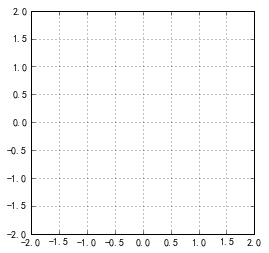